1. <font color="Red" >**Yapacağınız yorumlar ve oylamalar için teşekkür ederim ^____^**</font>

<a class="anchor" id="0."></a>
# **İçindekiler**

* [1. Çalışmanın Özeti](#1.)
* * [1.1. Gerekli Kütüphaneler Geliştirme Ortamına Dahil Ediliyor](#1.1.)
* [2. Veri Seti Hakkında Bağlamsal Değerlendirme](#2.)
* [3. Veri Seti Hakkında Teknik Değerlendirme](#3.)
* [4. Veri Setinin Görselleştirilmesi](#4.)
* * [4.1. Hangi Grafiği Kullanmalıyım?](#4.1.)
* * [4.2. Tek  Ayrık Değişken Dağılımı(Univariate Visualization)](#4.2.)
* * [4.3. Tek  Sürekli Değişken Dağılımı(Univariate Visualization)](#4.3.)
* * [4.4. Sınıf Dağılımları ve Özellik Değerlerinin Sınıflar Üzerindeki Dağılımı](#4.4.)
* * [4.5. Özelliklerin Birbirleriyle Olan İlişkisinin Gösterilmesi](#4.5.)
* * [4.6. Yardımcı Fonksiyon: draw_multivarient_plot(dataset, rows, cols, plot_type)](#4.6.)
* *  [4.7. İki Sınıf İçin Özellik-Hasta İlişkileri](#4.7.)
* * * [4.7.1. Violin Plot](#4.7.1.)
* * * [4.7.2. Point Plot](#4.7.2.)
* * * [4.7.3. Box Plot](#4.7.3.)
* * * [4.7.4. Bar Plot](#4.7.4.)
* * [4.8. Üç Sınıf İçin Özellik Hasta İlişkileri](#4.8.)
* * * [4.8.1. Violin Plot](#4.8.1.)
* * * [4.8.2. Point Plot](#4.8.2.)
* * * [4.8.3. Box Plot](#4.8.3.)
* * * [4.8.4. Bar Plot](#4.8.4.)
* [5. Sınıflandırma Performansı](#5.)
* * [5.1. Yardımcı Fonksiyonlar:get_models(), cross_validate(dataset, target_name)](#5.1.)
* * [5.2. İki Sınıf İçin Sınıflandırma Başarı Sonuçları](#5.2.)
* * [5.3. Üç Sınıf İçin Sınıflandırma Başarı Sonuçları](#5.3.)
* * [5.4. İki Sınıf İçin Çapraz Doğrulama Sonuçları](#5.4.)
* [6. En İyi Parametrelerin Bulunması: GridSearchCV](#6.)
* * [6.1. Özel GridSearch fonksiyonu: MY_SVM_GridSearch](#6.1.)
* * [6.2. İki Sınıf İçin Özel GridSearch Optimizasyon Sonuçları](#6.2.)
* * [6.3. Üç Sınıf İçin Çapraz Doğrulama Sonuçları](#6.3.)
* * [6.4. Üç Sınıf İçin Özel GridSearch Optimizasyon Sonuçları](#6.4.)
* * [6.5. sklearn GridSearchCV Sonuçları](#6.5.)
* * * [6.5.1. İki Sınıf İçin sklearn GridSearchCV Sonuçları](#6.5.1.)
* * * [6.5.2. Üç Sınıf İçin sklearn GridSearchCV Sonuçları](#6.5.2.)

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="1."></a>**1. Çalışmanın Özeti**

Bu çalışmada,  biyomekanik verilerine göre hastaların sınıflandırması yapılacaktır. Çalışmanın özeti şöyledir:
1. Veri setinin yüklenmesi
1. Gerekiyorsa ön işlemlerin yapılması
1. Veri setinin görselleştirilmesi
1. Ölçeklendirme yapılması
1. Farklı sınıflandırıcılara göre çapraz doğrulama sonuçlarının elde edilmesi
1. Çapraz doğrulaması en iyi sonucun optimizasyonunun yapılması

<a class="anchor" id="1.1."></a>**1.1. Gerekli Kütüphaneler Geliştirme Ortamına Dahil Ediliyor**

In [1]:
#Gerekli Kütüphanelerin Yüklenmesi Yapılıyor
import numpy as np # linear algebra
import pandas as pd # Veri işleme
#Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
#Makine Öğrenmesi Gereksimleri
# Ön işleme için
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Model seçimi için
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Makine öğrenmesi modelleri
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Sistem Kütüphaneleri
import os
import warnings
print(os.listdir("../input"))

['column_2C_weka.csv', 'column_3C_weka.csv']


In [2]:
#Uyarıları kapatılıyor
warnings.filterwarnings("ignore")
print("Uyarılar kapatıldı")

Uyarılar kapatıldı


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="2."></a>**2. Veri Seti Hakkında Bağlamsal Değerlendirme**

Veriler, iki farklı biçimde  sınıflandırma görevi için düzenlenmiştir.

**column_3C_weka.csv (üç sınıf etiketli dosya)**:

Hastalar, üç kategoriden birine ait sınıfla etiketlendirilmiştir ; Normal (100 hasta), Disk Hernia (60 hasta) veya Spondilolistez (150 hasta).

**column_2C_weka.csv (iki sınıf etiketli dosya):**

İkinci görev için Disk Hernia ve Spondylolisthesis kategorileri 'anormal' olarak etiketlenerek tek bir kategoride birleştirilmiştir. Böylece, hastalar, iki kategoriden birine ait sınıfla etiketlendirilmiştir; Normal (100 hasta) veya Anormal (210 hasta).

**Veri Setindeki Özellikler Hakkında**

Veri setindeki her hasta(örnek, satır); pelvis ve lomber omurganın (her biri bir sütundur) şekli ve oryantasyonundan türetilen altı biyomekanik özellikle temsil edilir:

* pelvik insidans
* pelvik eğim
* lomber lordoz açısı
* sakral eğim
* pelvik yarıçap
* spondilolistezis derecesi

In [3]:
#Üç sınıf içeren veri seti
dataset_3c=pd.read_csv("input/column_3C_weka.csv")
#Veri setinin ilk beş örneği(satırı) listelenecek. n varsayılan olarak 5'tir.  
dataset_3c.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia

In [4]:
#İki sınıf içeren veri seti
dataset_2c=pd.read_csv("input/column_2C_weka.csv")
#Veri setinin ilk beş örneği(satırı) listelenecek.
dataset_2c.head(n=3)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="3."></a>**3. Veri Seti Hakkında Teknik Değerlendirme** 
    
* İki veri setinde sınıf etiketi hariç tüm bilgiler aynıdır. 
* Veri seti 310 örnekten oluşmaktadır. 
* Tüm özellikler sayısal ve eksiksiz olduğu için, verilerin sayıya dönüştürülmesi ve eksik bilgilerin doldurulması gibi ön işlemlere gerek yoktur. 
* Özellik sütünlarında yer alan özelliklerin değer aralıkları birbirinden çok farklı olduğu için ölçeklendirme yapılmalıdır. Örneğin; pelvic_radius özelliği 100'den büyük değerler alabilirken degree_spondylolisthesis 5'e kadar değerler alabilmektedir.  

In [5]:
dataset_3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="4."></a>**4. Veri Setlerinin Görselleştirilmesi**  

Veri setinin görselleştirmesine geçebiliriz. Makine öğremesi modellerine hazır hale gelebilmesi için, veri setindeki değerlerin sayısal bir değer olması gerekir(**Not:** Görselleştirme, bazı grafikler için sayısal değerler olmadan da yapılabilir).  Sayısal değerler iki farlı nitelikte olabilir; sürekli ve ayrık değişkenler. 

**Sürekli değişken:** Sonsuz sayıda olası değere sahip bir değişkendir. Başka bir deyişle; değişken için herhangi bir değer mümkündür.

**Ayrık değişken:** Yalnızca belirli bir sayıda değer alabilen bir değişkendir. Başka bir deyişle; sonsuz sayıda değere sahip değildir. 


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="4.1."></a>**4.1. Hangi Grafiği Kullanmalıyım?**  

İstatistiksel analiz, bir veri kümesindeki değişkenlerin birbiriyle nasıl ilişkilendiğini ve bu ilişkilerin diğer değişkenlere nasıl bağlı olduğunu anlama sürecidir. Görselleştirme bu sürecin temel bir bileşenidir. Çünkü, veriler doğru bir şekilde görselleştirildiğinde, insanların bir ilişkiyi gösteren eğilimleri ve modelleri fark edebilmesini sağlar.

Veri setini görselleştirmek istediğimizde karşımıza çıkacak ihtimaller şunlardır:
* İki sürekli değişken arasındaki ilişki(dağılım)-Bivariate Visualization
* İki ayrık değişken arasındaki ilişki(dağılım)- Bivariate Visualization
* Sürekli-Ayrık değişkenler arasındaki ilişki(dağılım)- Bivariate Visualization
* Tek  sürekli değişken dağılımı- Univariate Visualization
* Tek  ayrık değişken dağılımı- Univariate Visualization
* İkinde fazla değişken arasındaki ilişki(dağılım)- Multivariate Visualization

<a class="anchor" id="4.2."></a>**4.2. Tek  Ayrık Değişken Dağılımı(Univariate Visualization)** <=====>[İçindekiler Menüsüne Git](#0.)

Veri setinde ayrık değerler içeren bir tane özellik vardır; class. Tek ayrık değerim dağılımı için kullanabileceğimiz grafik türleri; **countplot**(pandas için **bar** grafiğidir) ve **pie**. 

In [6]:
def discrete_univariate(dataset, discrete_feature):
    fig, axarr=plt.subplots(nrows=1,ncols=2, figsize=(8,5))
      
    dataset[discrete_feature].value_counts().plot(kind="bar",ax=axarr[0])
    dataset[discrete_feature].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[1])
        
    plt.tight_layout()
    plt.show()

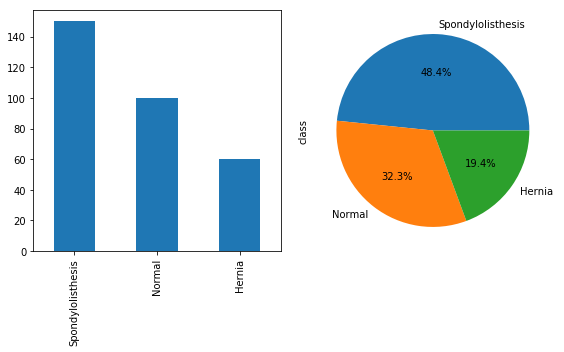

In [7]:
discrete_univariate(dataset=dataset_3c, discrete_feature="class")

Yukarıdaki şekilde üç sınıfın dağılımı bar ve daire grafikleriyle gösterilmiştir. Bar grafiği sınıfların dağılımlarını sayısal olarak yorumlamaya imkan verirken daire grafiği yüzdelik olarak yorumlamaya daha elverişlidir.  


<a class="anchor" id="4.3."></a>**4.3. Tek  Sürekli Değişken Dağılımı(Univariate Visualization)** <=====>[İçindekiler Menüsüne Git](#0.)

Tek sürekli değişken dağılımını göstermek için kullanılabilecek en iyi grafik türü **histogramdır**. Histogram, bar grafiğin sürekli değişkenler için uyarlanmış hali gibi düşünülebilir. Histogram grafiğinde sürekli değişkenler istenilen sayıda sütünla temsil edilir. Sütünların boyları, belirli aralıktaki değerlerin sıklığına göre elde edilir. 

Tek sürekli değişimin dağılımını gösteren bir diğer grafik türü Kernel Density Estimation(KDE) grafiğidir. KDE sürekli değişkenin dağılımını tek bir çizgiyle gösterir. Histogram sütünlarının üst kısımlarının bir çizgiyle birleştirilmesiyle KDE grafiği elde edilir. Genelde histogram ve KDE çizimleri tek bir grafikte gösterilir. 


In [8]:
def continuous_univariate(dataset, continuos_feature):
    fig, ax=plt.subplots(nrows=2,ncols=3, figsize=(12,8))

    ax=ax.flatten()

    "pandas çizim fonksiyonları kullanılıyor"
    dataset_3c[continuos_feature].plot.hist(density=True,ax=ax[0])
    dataset_3c[continuos_feature].plot.kde(ax=ax[1])
    dataset_3c[continuos_feature].plot.hist(density=True,ax=ax[2])
    dataset_3c[continuos_feature].plot.kde(ax=ax[2])

    "Seaborn çizim fonksiyonları kullanılıyor"
    sns.distplot(a=dataset_3c[continuos_feature], kde=False, ax=ax[3])
    sns.distplot(a=dataset_3c[continuos_feature], hist=False, ax=ax[4])
    sns.distplot(a=dataset_3c[continuos_feature], ax=ax[5]) 

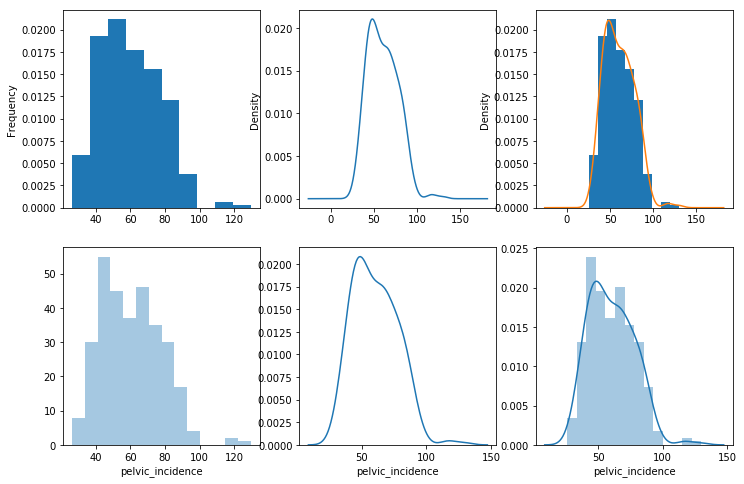

In [9]:
continuous_univariate(dataset=dataset_3c, continuos_feature="pelvic_incidence")

Yukarıdaki şekilde pelvic_incidence özelliğinin dağılımı histogram ve KDE grafikleriyle gösterilmektedir. Birinci satırdaki grafikler pandas fonksiyonlarıyla, ikinci satırdaki grafikler seaborn fonksiyonlarıyla elde edilmiştir. 

pelvic_incidence değişkenin dağılımı normal(Gaussian) dağılıma yakın bir yapıdadır. Değişken dağılımı ortalamanın sağında biraz daha fazladır.  Çoğu makine öğrenmesi modeli normal dağılıma sahip veri setlerinde daha iyi sonuç verir. 

Tüm değişkenlerin histogramın grafiğini pandas DataFrame nesnesinde yer alan hist() kolayca elde edilebilir.


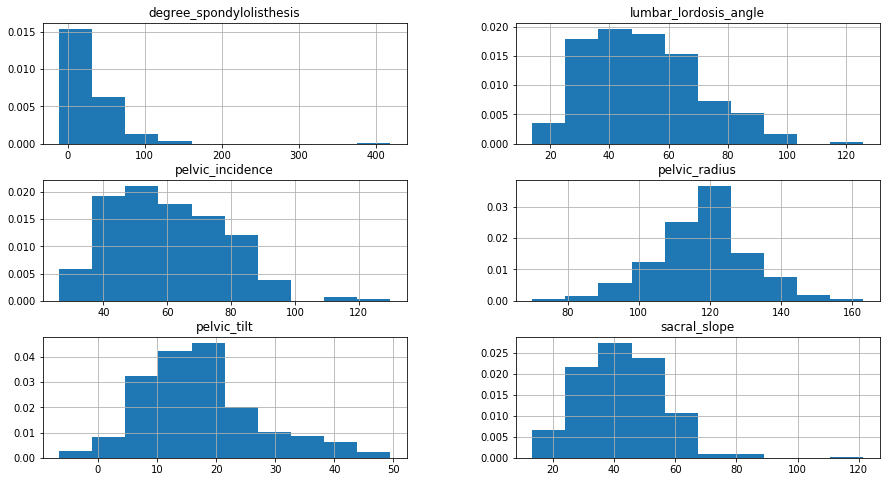

In [10]:
dataset_3c.hist(bins=10, density=True, figsize=(15,8))
plt.show()

Tüm sürekli değişkenleri histogram ve kde sağılımlarını seaborn kullanarak aşağıdaki gibi elde edebiliriz. 

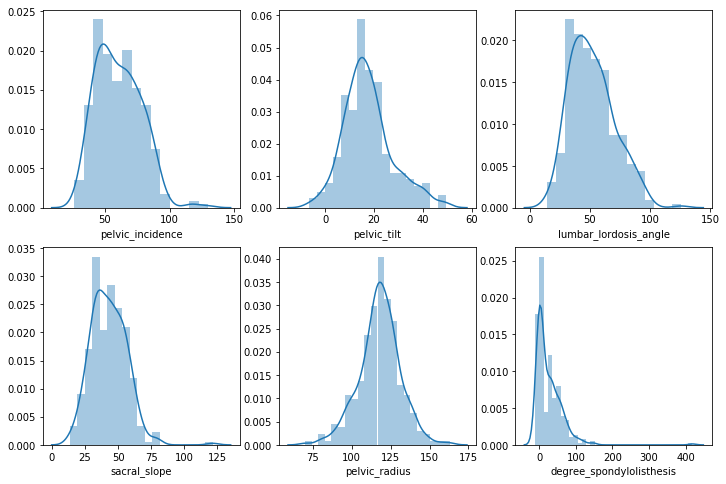

In [11]:
fig, ax=plt.subplots(nrows=2, ncols=3,figsize=(12,8))
ax=ax.flatten()
col_names=dataset_3c.drop('class', axis=1).columns.values

for i,col_name in enumerate(col_names):
    sns.distplot(a=dataset_3c[col_name], ax=ax[i])

Yukarıdaki tabloda tüm sürekli değişkenlerin dağılımı yer almaktadır. 

<a class="anchor" id="4.4."></a>**4.4. Sınıf Dağılımlar ve Özellik Değerlerinin Sınıflar Üzerindeki Dağılımı** <=====>[İçindekiler Menüsüne Git](#0.)



'class' değişkeni ayrık bir değer olduğu için diğer değişkenlerle olan ilişkisi kategorik verilerin görselleştirmesinde kullanılan çizim türleri tercih edilecektir. Seaborn kütüphanesinde kategorik değerler için kullanılan çizim türler şunlardır: stripplot(), swarmplot(), boxplot(), violinplot(), boxenplot() pointplot(), barplot(), countplot().

Öncelikle sınıf dağılımlarını öğrenmek için countplot() grafik türünü kullanalım. Daha sonra çıktı değişkeniyle herbir girdi değişkeni arasındaki ilişkiyi swarmplot ile gösterelim


In [12]:
def plot_categorical(dataset, categorical_feature, rows, cols):
    fig, axarr=plt.subplots(nrows=2,ncols=4, figsize=(15,10))
    features=dataset.columns.values[:-1]
    
    counter=0
    #sns.countplot(x=categorical_feature, data=dataset, ax=axarr[0,0])
    dataset['class'].value_counts().plot.bar(ax=axarr[0,0])
    dataset['class'].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[0,1])
    for i in range(rows):
        for j in range(cols):
            feature=features[counter]
            if (i==0 and j==0) or (i==0 and j==1):
                continue
            else:
                sns.swarmplot(x=categorical_feature,y=feature,
                             
                            data=dataset, 
                            ax=axarr[i, j])
            counter=counter+1
            if counter>=len(features):
                break
    
    plt.tight_layout()
    plt.show()

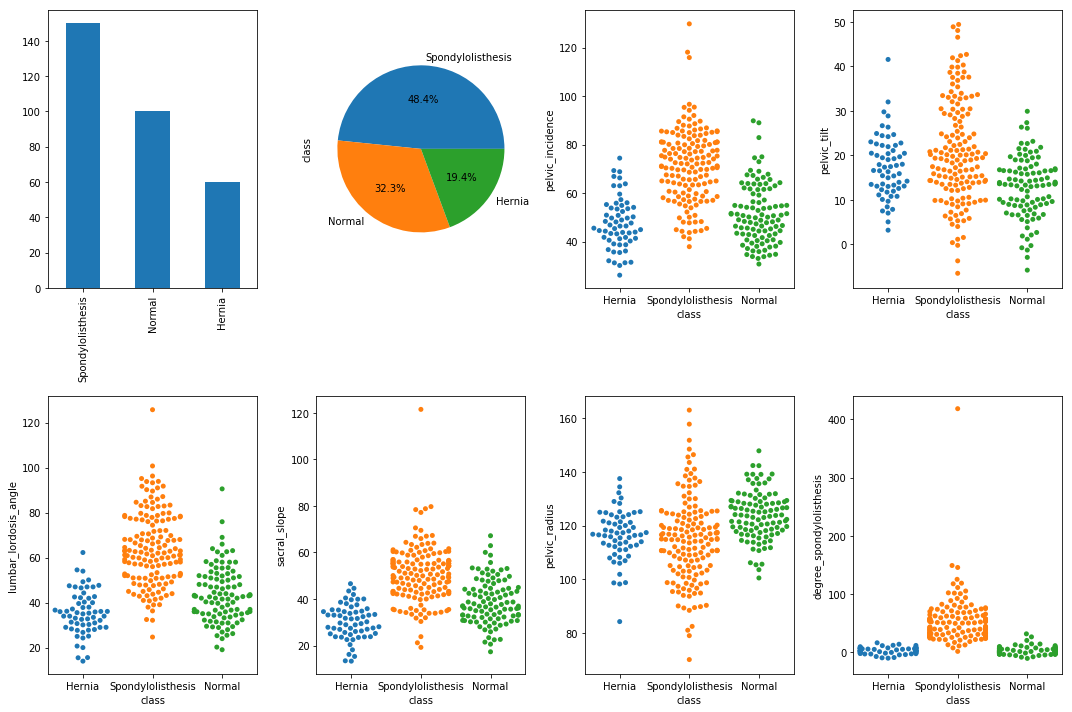

In [13]:
plot_categorical(dataset=dataset_3c, categorical_feature="class", rows=2, cols=4)

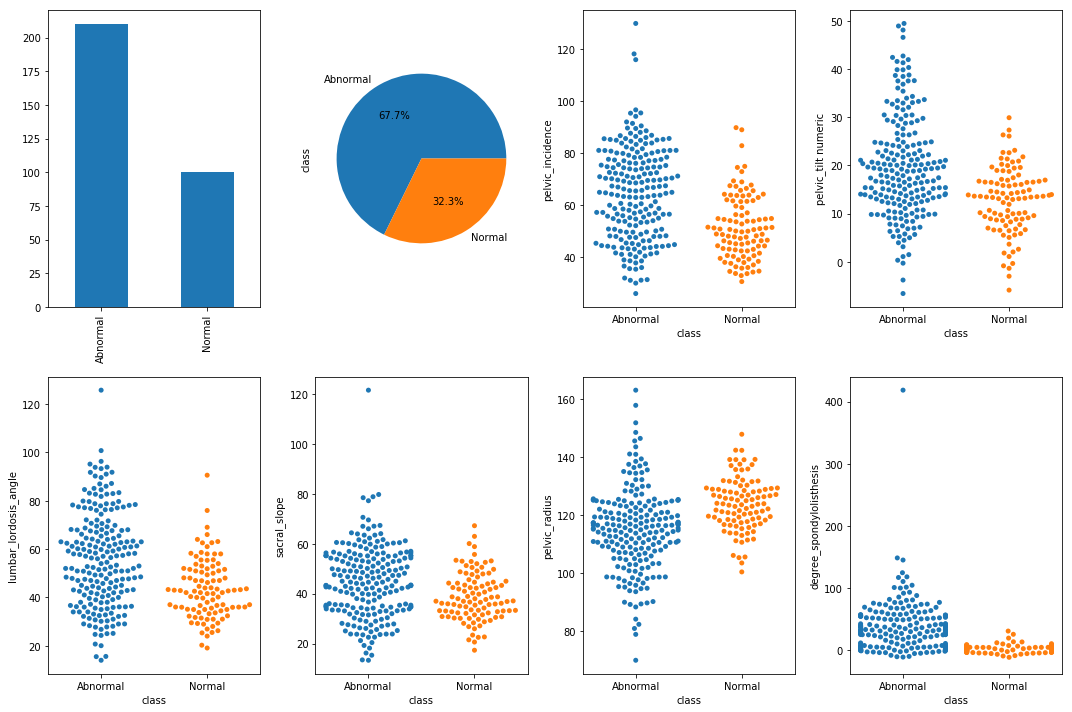

In [14]:
plot_categorical(dataset=dataset_2c, categorical_feature="class", rows=2, cols=4)

<a class="anchor" id="4.5."></a>**4.5. Özelliklerin Birbirleriyle Olan İlişkisinin Gösterilmesi** <=====>[İçindekiler Menüsüne Git](#0.)

Tüm değişkenlerin birbirleri arasındaki ilişkiyi pairplot ve korelasyon matrisyle gözlemleyebiliriz. 

pairplot tüm değişkenlerin birbirleriyle olan ilişkilerini serpme(scatter) grafiklerle gösterir. iki değişken arasında  lineer bir ilişki varsa bu değişkenlerden birini çıkarmak makine öğrenmesi modelinin performansına olumlu etki yapma olasılığı yüksektir. 

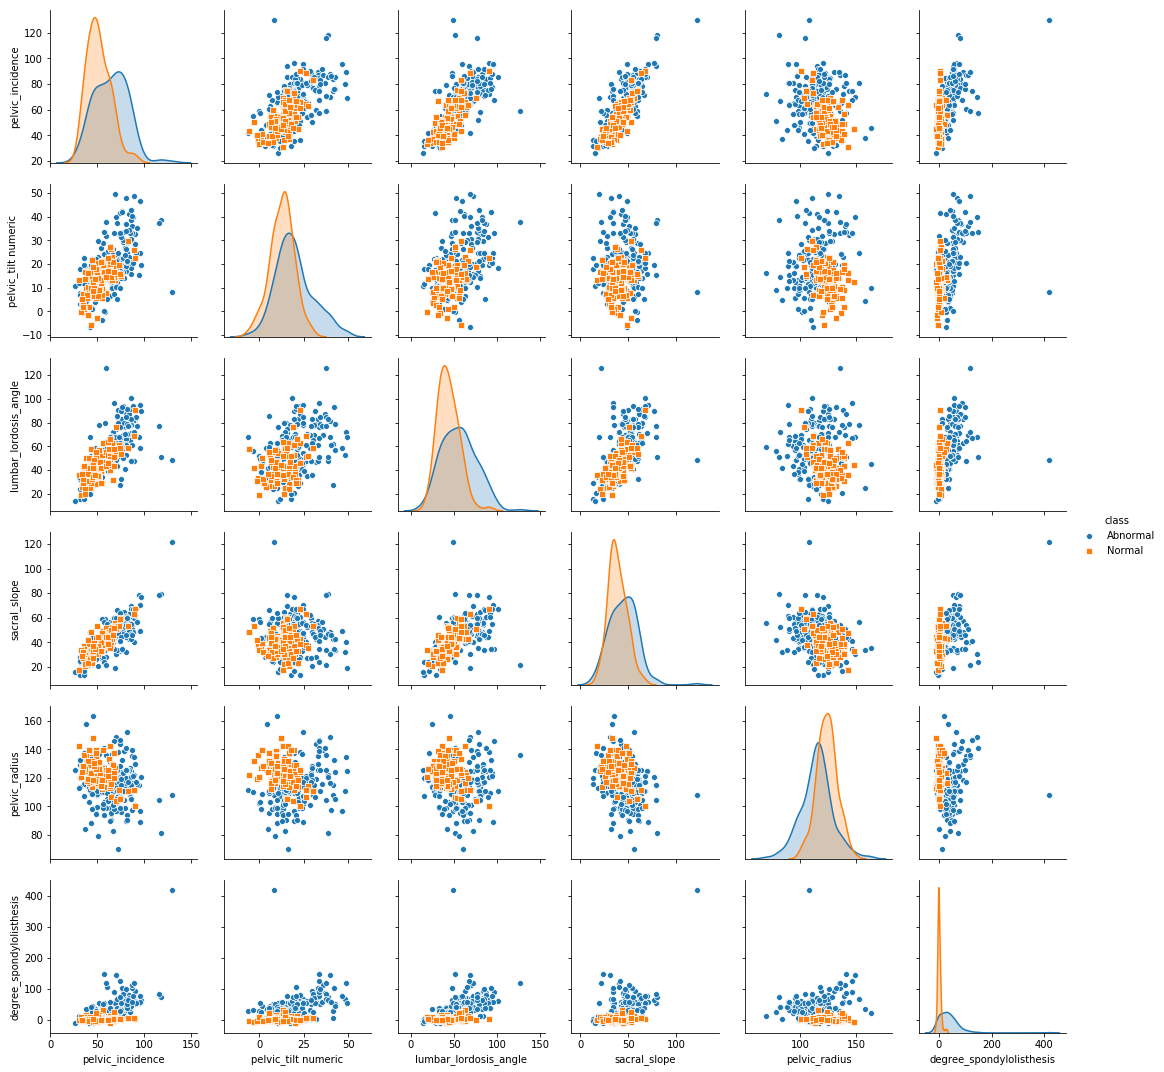

In [15]:
#Sınıflar ile özelliklerin ikilişkisini gösteren pairplot
sns.pairplot(dataset_2c, hue="class", markers=["o", "s"])

In [16]:
#Sınıflar ile özelliklerin ikilişkisini gösteren pairplot
sns.pairplot(dataset_3c, hue="class", markers=["o", "s",'D'])

Korelasyon matrisi değişkenlerin birbiriyle olan ilişkini yönünü ve gücünü belirler. piarplot grafiğinin sunduğu ilişkiyi daha açık ve sayısal değerlerle sunar. Korelasyon matrisi veri setini bir bütün olarak yorumlamak için en iyi grafik türüdür.

In [17]:
corr=dataset_3c.corr()

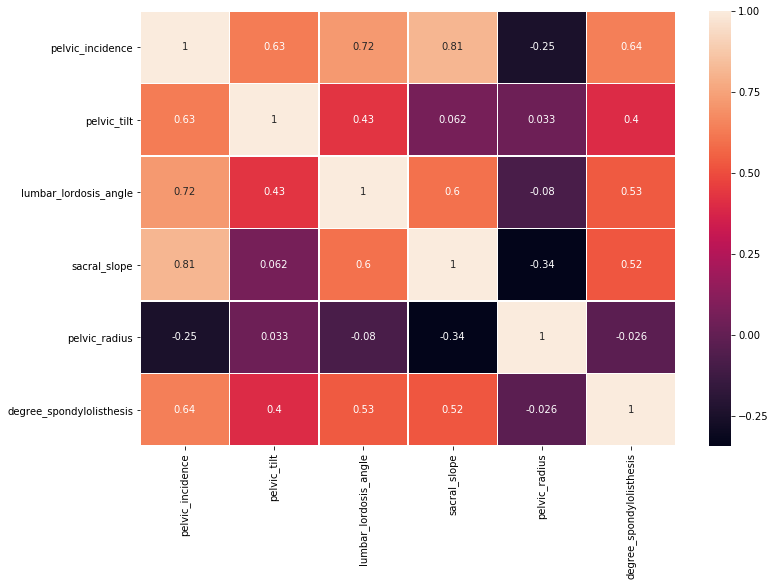

In [18]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

<a class="anchor" id="4.6."></a>**4.6. Yardımcı Fonksiyon: draw_multivarient_plot(dataset, rows, cols, plot_type)** <=====>[İçindekiler Menüsüne Git](#0.)


Veri setindeki özelliklerin, sınıf ile ilişkilerini yorumlayabilmek için; 

1. Keman Grafiği (Violin Plot) 
1. Kutu Grafiği (Box Plot) 
1. Nokta Grafiği (Point Plot)
1. Bar Grafiği (Bar Plot) 
grafkilerini kullanabiliriz

In [19]:
#Sınıflar ile özelliklerin ikilişkisini gösteren farklı grafikler;
#boxplot, violinplot, pointplot, barplot
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    
    assert plot_type in ['violin', "box", "point", "bar"],"We dont have such as plot type:{}".format(plot_type)
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))
    
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='class', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='class', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='class',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='class',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

<a class="anchor" id="4.7."></a>**4.7. İki Sınıf İçin Özellik-Hasta İlişkileri** <=====>[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="4.7.1."></a>**4.7.1. Violin Plot** <=====>[İçindekiler Menüsüne Git](#0.)

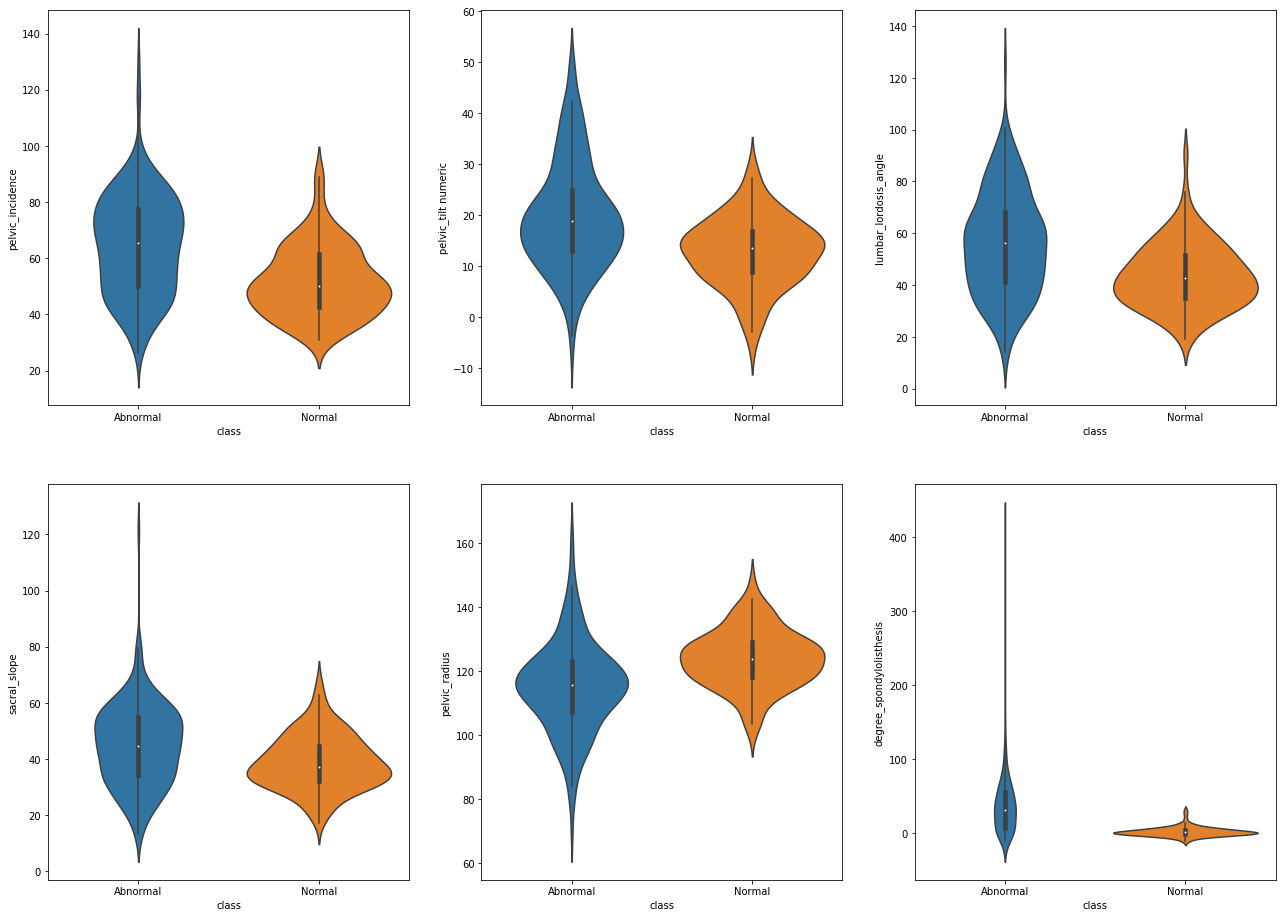

In [20]:
draw_multivarient_plot(dataset=dataset_2c, rows=2, cols=3,plot_type="violin")

<a class="anchor" id="4.7.2."></a>**4.7.2Point Plot** <=====>[İçindekiler Menüsüne Git](#0.)

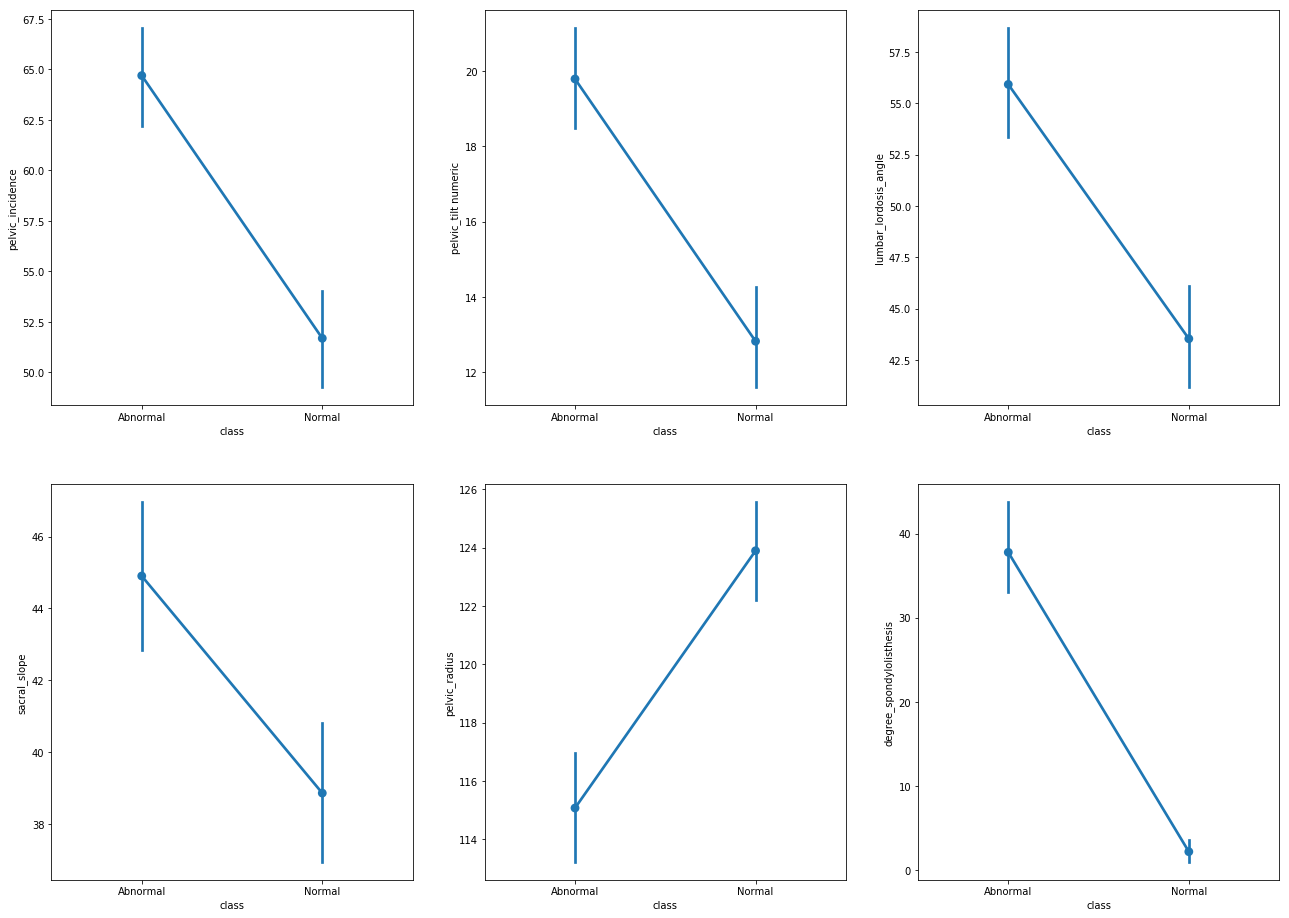

In [21]:
draw_multivarient_plot(dataset=dataset_2c, rows=2, cols=3,plot_type="point")

<a class="anchor" id="4.7.3."></a>**4.7.3. Box Plot** <=====>[İçindekiler Menüsüne Git](#0.)

In [22]:
draw_multivarient_plot(dataset=dataset_2c, rows=2, cols=3,plot_type="box")

<a class="anchor" id="4.7.4."></a>**4.7.4. Bar Plot** <=====>[İçindekiler Menüsüne Git](#0.)

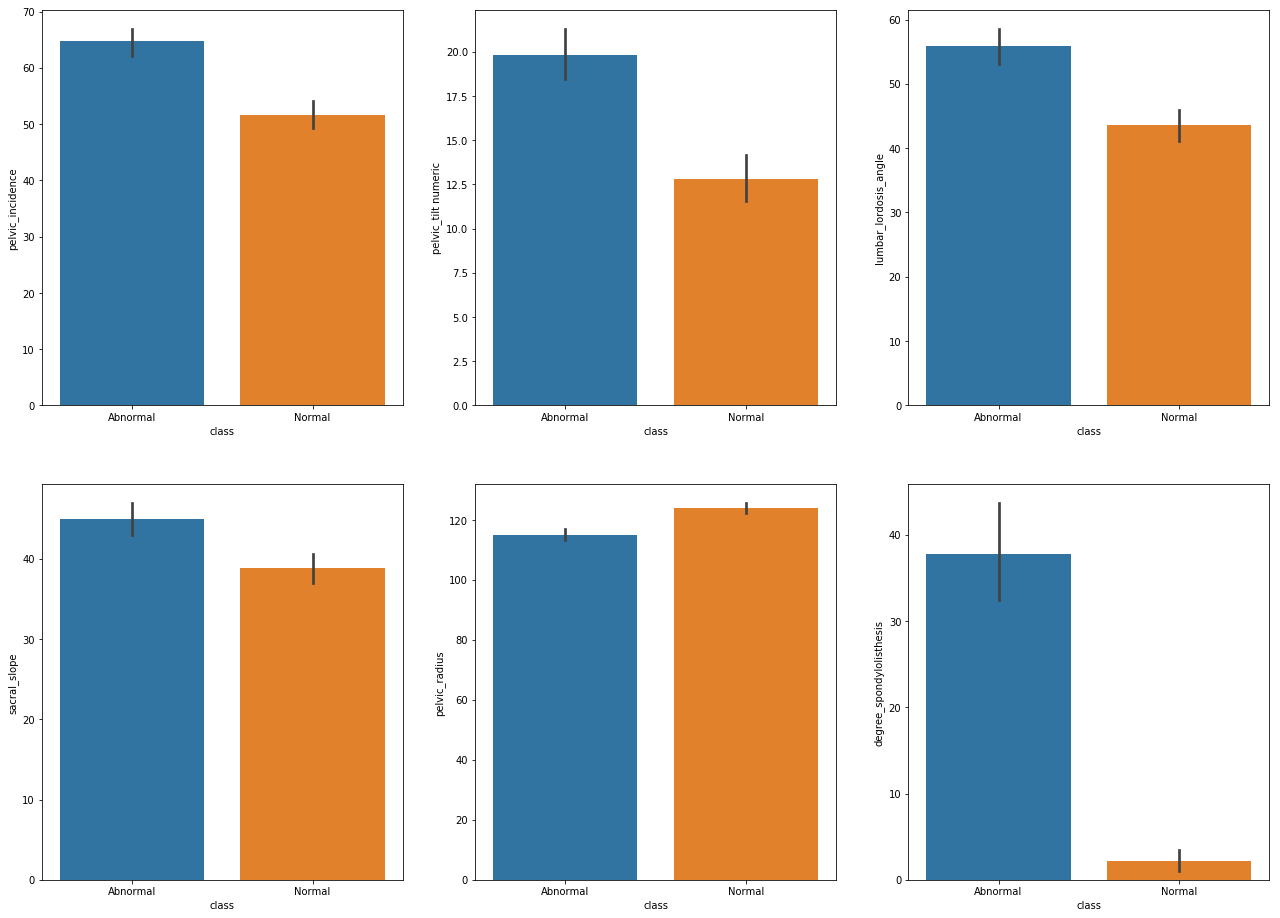

In [23]:
draw_multivarient_plot(dataset=dataset_2c, rows=2, cols=3,plot_type="bar")

<a class="anchor" id="4.8."></a>**4.8. Üç Sınıf İçin Özellik-Hasta İlişkileri** <=====>[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="4.8.1."></a>**4.8.1. Violin Plot** <=====>[İçindekiler Menüsüne Git](#0.)

In [24]:
draw_multivarient_plot(dataset=dataset_3c, rows=2, cols=3,plot_type="violin")

<a class="anchor" id="4.8.2."></a>**4.8.2 Point Plot** <=====>[İçindekiler Menüsüne Git](#0.)

In [25]:
draw_multivarient_plot(dataset=dataset_3c, rows=2, cols=3,plot_type="point")

<a class="anchor" id="4.8.3."></a>**4.8.3. Box Plot** <=====>[İçindekiler Menüsüne Git](#0.)

In [26]:
draw_multivarient_plot(dataset=dataset_3c, rows=2, cols=3,plot_type="box")

<a class="anchor" id="4.8.4."></a>**4.8.4. Bar Plot** <=====>[İçindekiler Menüsüne Git](#0.)

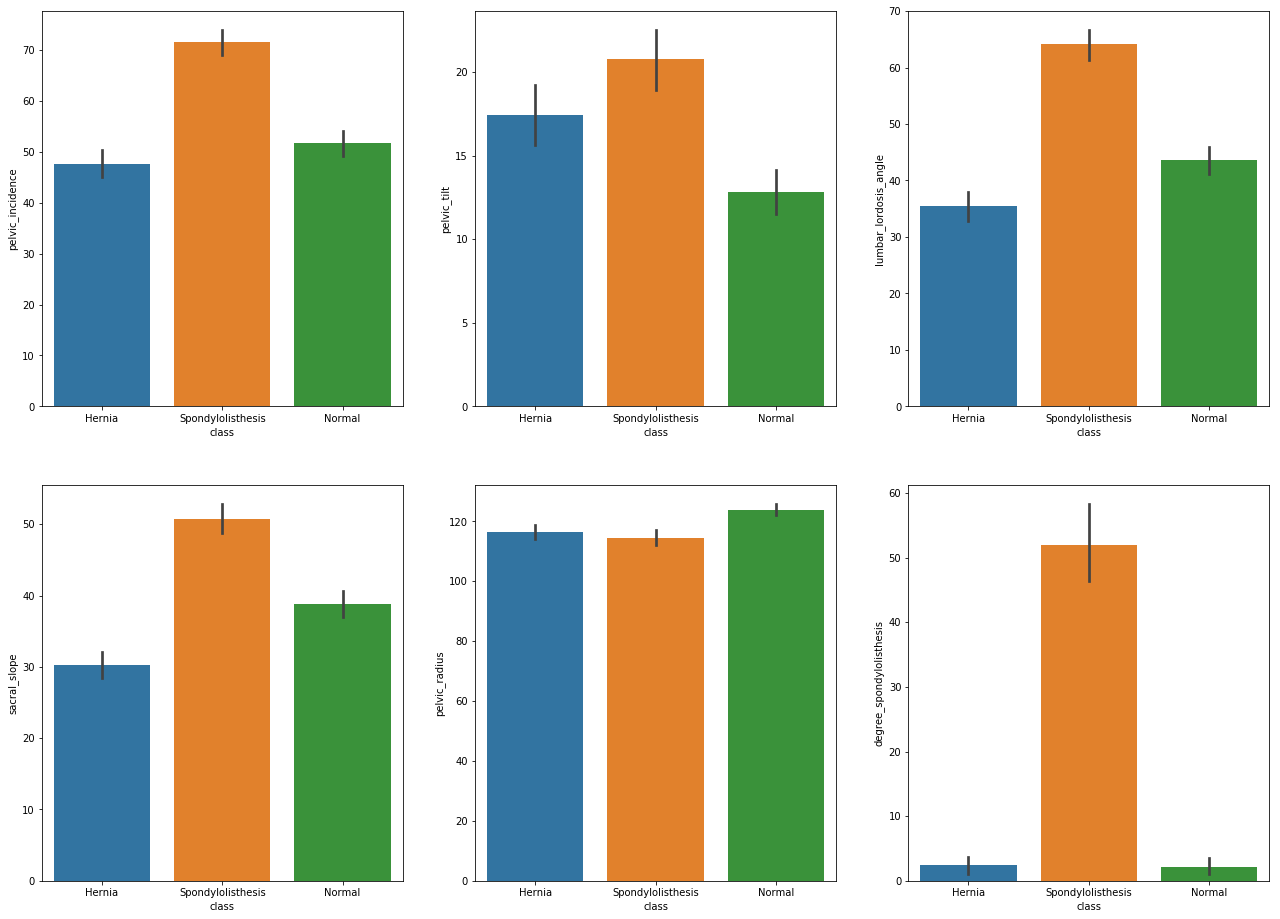

In [27]:
draw_multivarient_plot(dataset=dataset_3c, rows=2, cols=3,plot_type="bar")

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5."></a>**5. Sınıflandırma Performansı**

<a class="anchor" id="5.1."></a>**5.1. Yardımcı Fonksiyonlar** <=====>[İçindekiler Menüsüne Git](#0.)

**get_models():** Kullanılacak makine öğrenmesi algoritmalarına geri dönen fonksiyon

**get_X_and_y():** Veri setini 'veri(X)' ve 'çıktı(y)' olarak ayrıştırır. 

**accuracy_scores_for_various_ml_models():** Kullanılan makine öğrenmesi algoritmlarının başarı oranlarına geri döner

**cross_validate(dataset, target_name):** Var olan makine öğrenmesi algoritmaları için çapraz doğrulama sonuçlarını veren fonksiyon

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("LDA", LinearDiscriminantAnalysis()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier(n_neighbors = 3)))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    
    return models

In [30]:
def get_X_and_y(dataset, target_name):
    X=dataset.drop(target_name, axis=1)
    y=dataset[target_name]

    X=StandardScaler().fit_transform(X)
    
    labelEncoder=LabelEncoder()
    y=labelEncoder.fit_transform(y)
    
    return X, y

In [31]:
def accuracy_scores_for_various_ml_models(X, y):
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    models=get_models()
    for name, model in models:
        model.fit(X_train, y_train)
        score=model.score(X_test, y_test)
        
        print("{} accuracy:{:.2f}".format(name, score))

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.2."></a>**5.2. İki Sınıf İçin Sınıflandırma Başarı Sonuçları** 

In [32]:
print("dataset_2c Veri Seti İçin Başarı Oranları")
X, y=get_X_and_y(dataset=dataset_2c, target_name='class')
accuracy_scores_for_various_ml_models(X, y)

dataset_2c Veri Seti İçin Başarı Oranları
LR accuracy:0.91
LDA accuracy:0.84
NB accuracy:0.80
KNN accuracy:0.80
DT accuracy:0.76
SVM rbf accuracy:0.86
SVM linear accuracy:0.91


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.3."></a>**5.3. Üç Sınıf İçin Sınıflandırma Başarı Sonuçları**

In [33]:
print("dataset_3c Veri Seti İçin Başarı Oranları")
X, y=get_X_and_y(dataset=dataset_3c, target_name='class')
accuracy_scores_for_various_ml_models(X, y)

dataset_3c Veri Seti İçin Başarı Oranları
LR accuracy:0.84
LDA accuracy:0.77
NB accuracy:0.78
KNN accuracy:0.77
DT accuracy:0.83
SVM rbf accuracy:0.81
SVM linear accuracy:0.85


In [34]:

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()
    results=[]
    names= []

    for name, model in models:
        kfold=KFold(n_splits=5,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))


def cross_validate(dataset, target_name):
    X, y=get_X_and_y(dataset, target_name)

    cross_validation_scores_for_various_ml_models(X, y)

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.4."></a>**5.4. İki Sınıf İçin Çapraz Doğrulama Sonuçları** 

In [35]:
cross_validate(dataset=dataset_2c, target_name="class")

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.55
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.75
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.63
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.65
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.64
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.64


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="6."></a>**6. En İyi Parametrelerin Bulunması: GridSearchCV** 

<a class="anchor" id="6.1."></a>**6.1. Yardımcı Fonksiyon:MY_SVM_GridSearch(dataset, target_name)** <=====>[İçindekiler Menüsüne Git](#0.)

In [36]:
def MY_SVM_GridSearch(dataset, target_name):
    X=dataset.drop(target_name, axis=1)
    y=dataset[target_name]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    kernels=['rbf', 'linear']
    
    for gamma in gammas:
        for C in Cs:
            for kernel in kernels:
                svm=SVC(kernel=kernel,gamma=gamma, C=C)
                svm.fit(X_train, y_train)
                
                score=svm.score(X_test, y_test)

                if score>best_score:
                    y_pred=svm.predict(X_test)
                    best_score=score
                    best_params={'kernel':kernel, 'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

<a class="anchor" id="6.2."></a> **6.2. İki Sınıf İçin Özel GridSearch Optimizasyon Sonuçları** <=====>[İçindekiler Menüsüne Git](#0.)

In [37]:
MY_SVM_GridSearch(dataset=dataset_2c, target_name='class')

best score: 0.9032258064516129
best params: {'kernel': 'linear', 'C': 10, 'gamma': 0.001}
classification reports:
               precision    recall  f1-score   support

    Abnormal       0.94      0.93      0.93        69
      Normal       0.80      0.83      0.82        24

    accuracy                           0.90        93
   macro avg       0.87      0.88      0.88        93
weighted avg       0.90      0.90      0.90        93



<a class="anchor" id="6.3."></a>**6.3. Üç Sınıf İçin Çapraz Doğrulama Sonuçları** <=====>[İçindekiler Menüsüne Git](#0.)

In [38]:
cross_validate(dataset=dataset_3c, target_name="class")

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.64
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.60
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.65
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.63
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.68


<a class="anchor" id="6.4."></a>**6.4. Üç Sınıf İçin Özel GridSearch Optimizasyon Sonuçları** <=====>[İçindekiler Menüsüne Git](#0.)

In [39]:
MY_SVM_GridSearch(dataset=dataset_3c, target_name='class')

best score: 0.8494623655913979
best params: {'kernel': 'linear', 'C': 0.001, 'gamma': 0.001}
classification reports:
                    precision    recall  f1-score   support

           Hernia       0.67      0.56      0.61        18
           Normal       0.70      0.79      0.75        24
Spondylolisthesis       0.98      0.98      0.98        51

         accuracy                           0.85        93
        macro avg       0.78      0.78      0.78        93
     weighted avg       0.85      0.85      0.85        93



<a class="anchor" id="6.5."></a>**6.5. sklearn GridSearchCV** <=====>[İçindekiler Menüsüne Git](#0.)

In [40]:
scv_params=[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

grid_search=GridSearchCV(SVC(), scv_params, cv=5)

<a class="anchor" id="6.5.1."></a>**6.5.1. İki Sınıf İçin sklearn GridSearchCV Sonuçları** <=====>[İçindekiler Menüsüne Git](#0.)

In [41]:
X, y=get_X_and_y(dataset=dataset_2c, target_name='class')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
grid_search.fit(X_train, y_train)

print("İki Sınıf İçin sklearn GridSearchCV Sonuçları")
print()
print("best params:{}".format(grid_search.best_params_))

print()
test_means=grid_search.cv_results_['mean_test_score']
print("ortalama test sonucu:{:.2f}".format(np.mean(test_means)))

print()
y_pred=grid_search.predict(X_test)
print("en iyi parametre sonucu:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("classification report:\n{}".format(classification_report(y_test, y_pred)))


İki Sınıf İçin sklearn GridSearchCV Sonuçları

best params:{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

ortalama test sonucu:0.78

en iyi parametre sonucu:0.86
classification report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        69
           1       0.72      0.75      0.73        24

    accuracy                           0.86        93
   macro avg       0.82      0.82      0.82        93
weighted avg       0.86      0.86      0.86        93



<a class="anchor" id="6.5.2."></a>**6.5.2. Üç Sınıf İçin sklearn GridSearchCV Sonuçları**

In [42]:
X, y=get_X_and_y(dataset=dataset_3c, target_name='class')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
grid_search.fit(X_train, y_train)

print("Üç Sınıf İçin sklearn GridSearchCV Sonuçları")
print()
print("best params:{}".format(grid_search.best_params_))

print()
test_means=grid_search.cv_results_['mean_test_score']
print("ortalama test sonucu:{:.2f}".format(np.mean(test_means)))

print()
y_pred=grid_search.predict(X_test)
print("en iyi parametre sonucu:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("classification report:\n{}".format(classification_report(y_test, y_pred)))


Üç Sınıf İçin sklearn GridSearchCV Sonuçları

best params:{'C': 1, 'kernel': 'linear'}

ortalama test sonucu:0.75

en iyi parametre sonucu:0.85
classification report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.70      0.79      0.75        24
           2       0.98      0.98      0.98        51

    accuracy                           0.85        93
   macro avg       0.78      0.78      0.78        93
weighted avg       0.85      0.85      0.85        93

